In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


Importing dataset for cleaning and analysis

In [3]:
customer_data = pd.read_csv('Mall_Customers.csv')

In [4]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Checking for null values

In [5]:
customer_data.shape

(200, 5)

In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

By analysing columns, we only need last two columns for our project

In [8]:
x = customer_data.iloc[:,[3,4]]

In [9]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Choosing the no. of clusters, 
finding the effective value of cluster using WCSS[within clusters sum of squares]

In [10]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x)

  wcss.append(kmeans.inertia_)

In [11]:
print(wcss)

[269981.28000000014, 183653.3289473683, 106348.37306211119, 73880.64496247198, 44448.45544793369, 40825.16946386947, 33642.57922077922, 26686.837785187785, 24766.471609793436, 23103.122085983905]


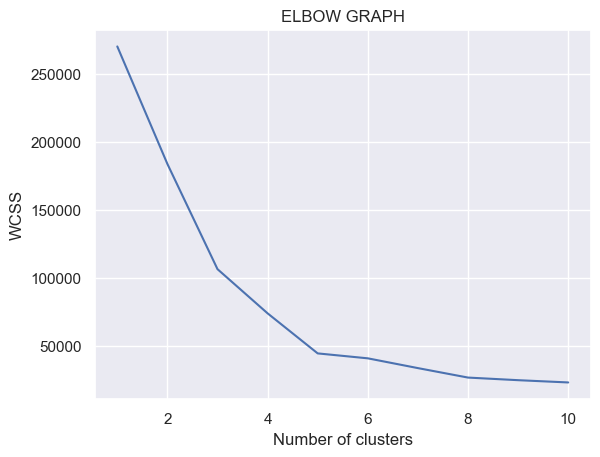

In [14]:
#ploting elbow ghaph using wcss values

sns.set()
plt.plot(range(1,11),wcss)
plt.title("ELBOW GRAPH")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In Elbow graph we can see that at 5th point there is second drop. So we choose that point optimal.

Traning the KMeans cluster model

In [15]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)

#y is nothing but a list containing clusters values assigned to 'x' list
y = kmeans.fit_predict(x)
print(y)


[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


Visualizing all clusters point

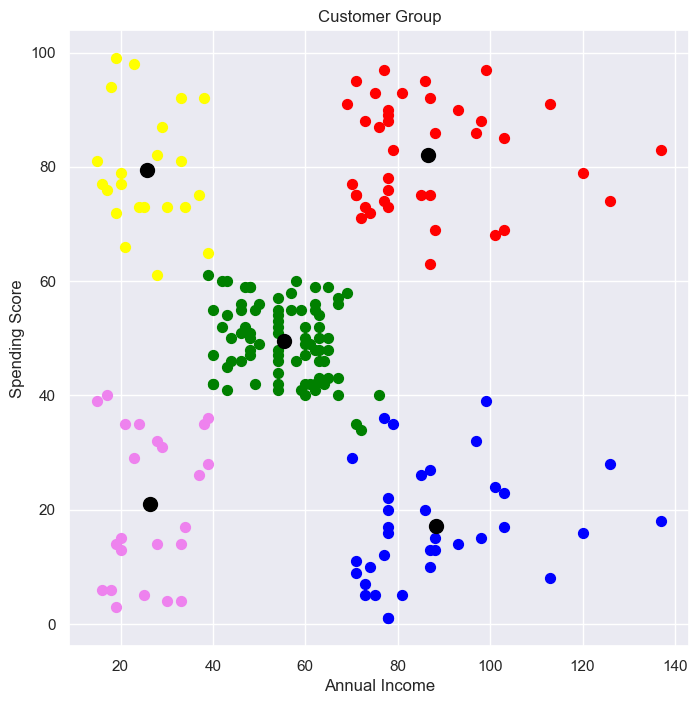

In [22]:
X = x.values
#giving error because my x list is in pandas and i cannot use comma-separated indexing on it directly like x[mask, column_index], so i converted x from pandas to numpy

#plotting all clusters
plt.figure(figsize=(8,8))
plt.scatter(X[y==0,0],X[y==0,1], s=50, c='green', label='cluster_1') 
plt.scatter(X[y==1,0],X[y==1,1], s=50, c='red', label='cluster_2')
plt.scatter(X[y==2,0],X[y==2,1], s=50, c='blue', label='cluster_3')
plt.scatter(X[y==3,0],X[y==3,1], s=50, c='violet', label='cluster_4')
plt.scatter(X[y==4,0],X[y==4,1], s=50, c='yellow', label='cluster_5')

#plotting all centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='centroid')

plt.title("Customer Group")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()
